<a href="https://colab.research.google.com/github/samiraeshraghi/6220-project/blob/main/Samira_Eshraghi_INSE6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**


**Install Pycaret**

In [ ]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret

In [ ]:
!pip install shap
!pip install numba==0.53
!pip install pca
!pip install statsmodels --upgrade
!pip install library==version_number

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.1 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.53 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.1, 0.29.0, 0.30.0, 0.30.1, 0.31

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.1'

In [ ]:
import shap
import numba

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.0.3
Seaborn version:  0.13.1


**Dataset**

Additional Information

The dataset was acquired and annotated by professional physicians at 'Hospital Universitario de Caracas'.
The subjective judgments (target variables) were originally done in an ordinal manner (poor, fair, good, excellent) and was discretized in two classes (bad, good).
Images were randomly sampled from the original colposcopic sequences (videos).
The original images and the manual segmentations are included in the 'images' directory.


Additional Variable Information

rgb_total_r_mean: average color information in the image (B channel).
rgb_total_r_std: stddev color information in the image (R channel).
rgb_total_r_mean_minus_std: (avg - stddev) color information in the image (R channel).
rgb_total_r_mean_plus_std: (avg + stddev) color information in the image (R channel).
rgb_total_g_mean: average color information in the image (G channel).
rgb_total_g_std: stddev color information in the image (G channel).
class: two classes bad = 0, good = 1
https://archive.ics.uci.edu/dataset/384/quality+assessment+of+digital+colposcopies

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('/content/RaisinDataset.csv')
df.head(25)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
5,49242,318.125407,200.122120,0.777351,51368,0.658456,881.836,0
6,42492,310.146072,176.131449,0.823099,43904,0.665894,823.796,0
7,60952,332.455472,235.429835,0.706058,62329,0.743598,933.366,0
8,42256,323.189607,172.575926,0.845499,44743,0.698031,849.728,0
9,64380,366.964842,227.771615,0.784056,66125,0.664376,981.544,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

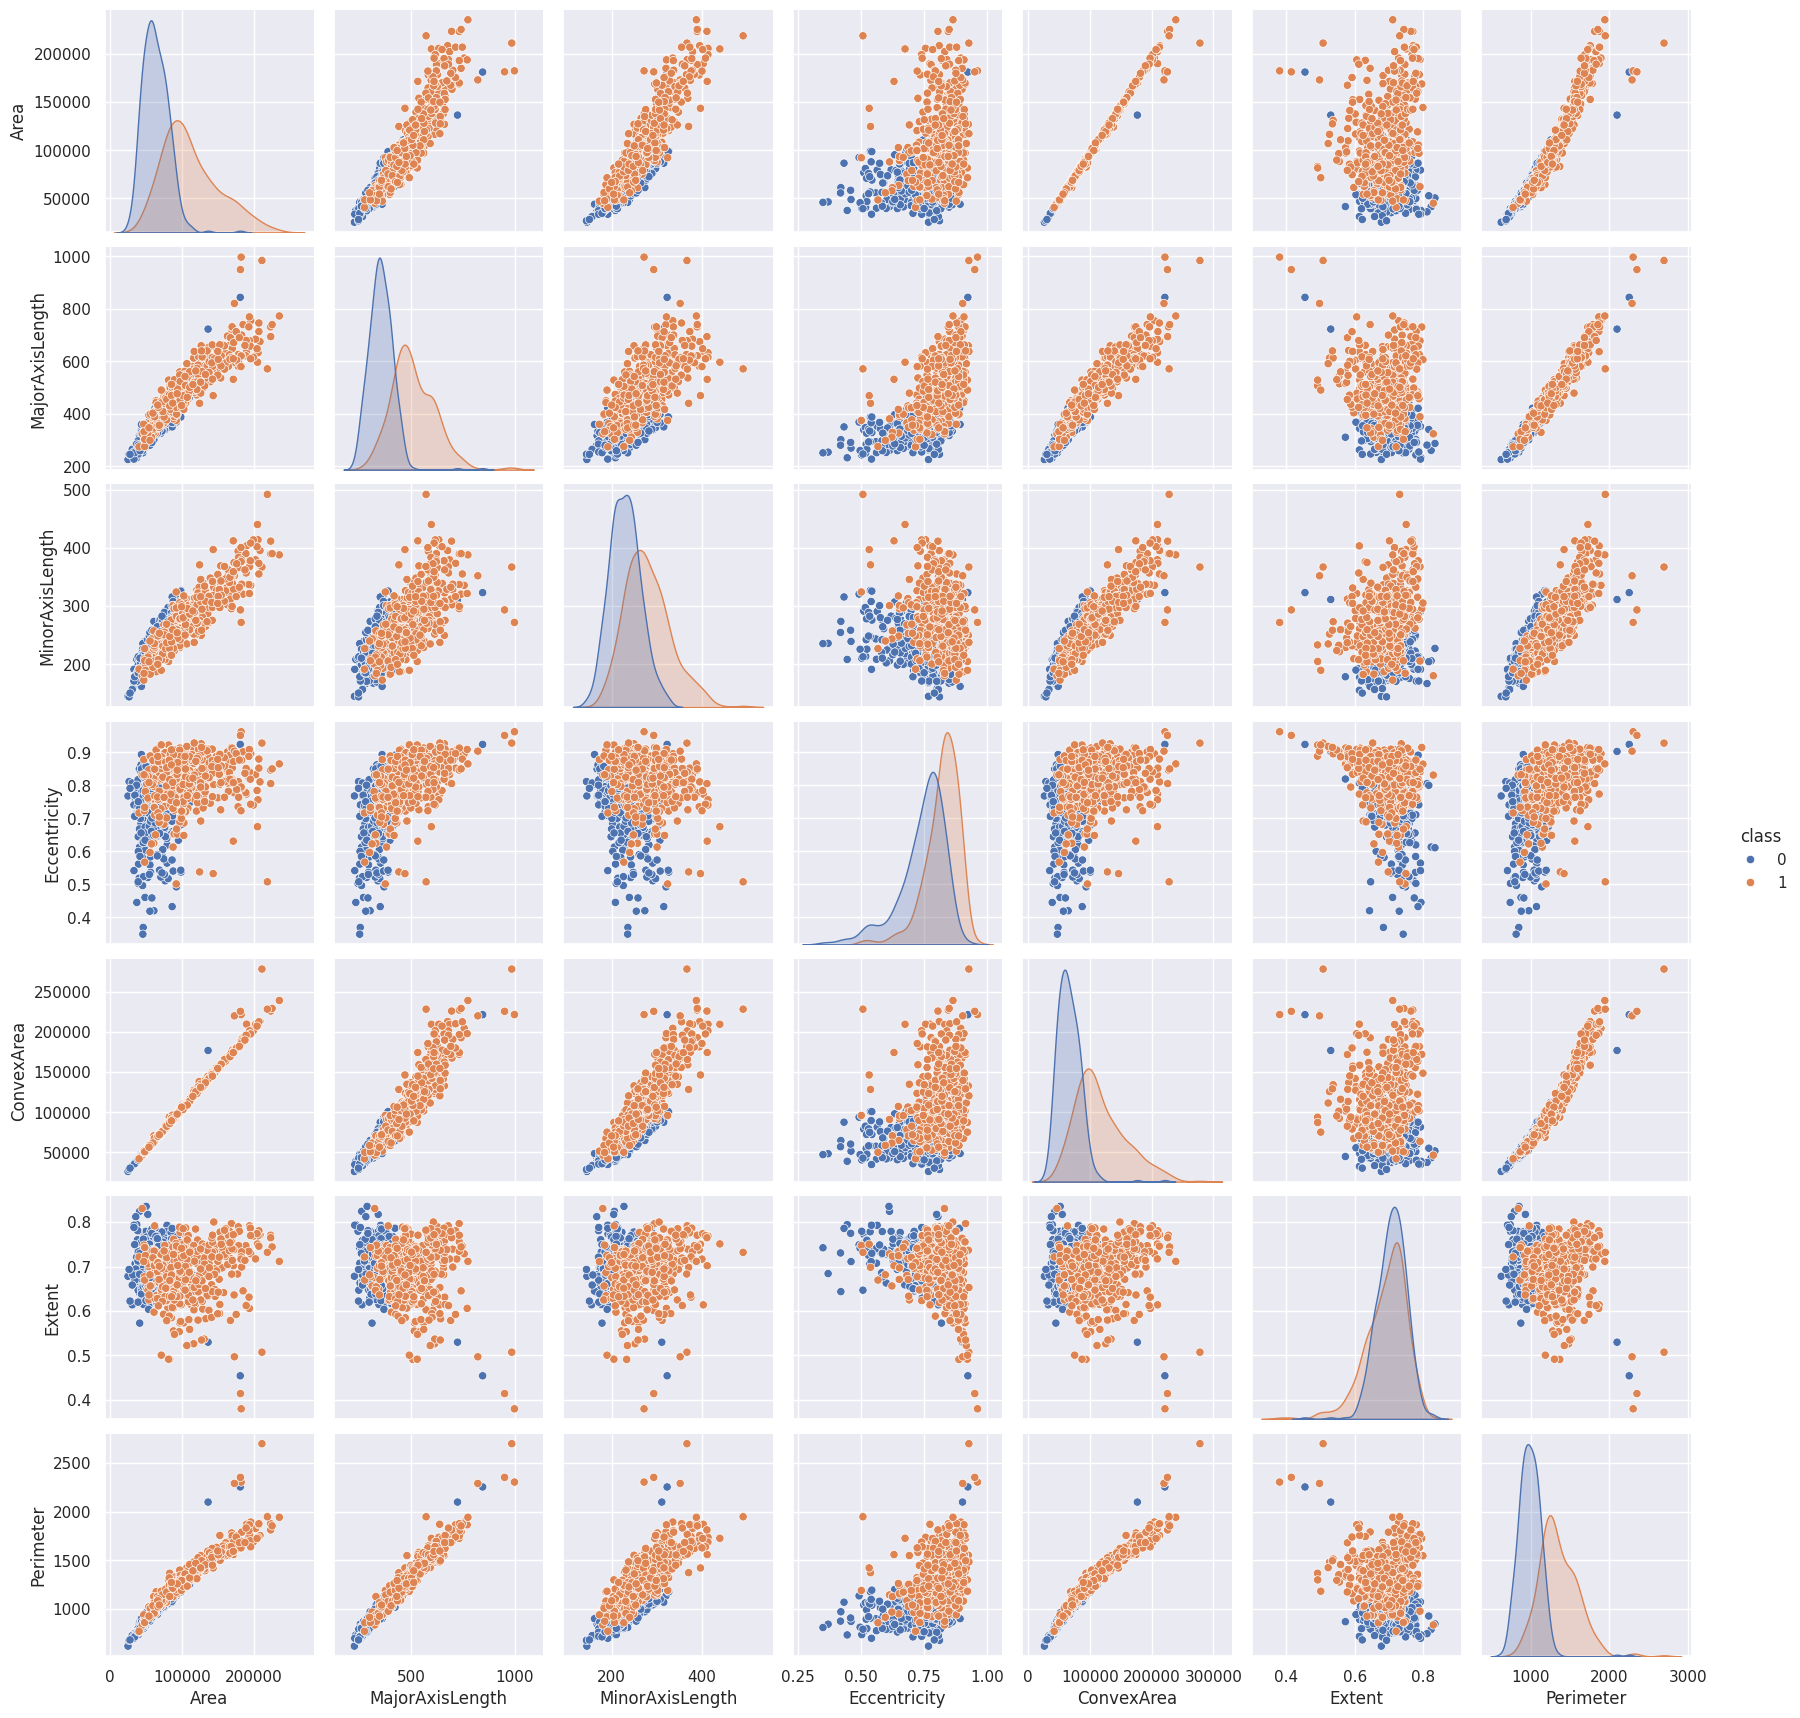

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

In [ ]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['class'])
X.head(10)

,rgb_total_r_mean,rgb_total_r_std,rgb_total_r_mean_minus_std,rgb_total_r_mean_plus_std,rgb_total_g_mean,rgb_total_g_std
0,103.658301,49.345441,54.312861,153.003742,75.707518,39.582202
1,31.156198,34.615624,-3.459426,65.771822,24.730717,31.420602
2,94.761070,57.491034,37.270036,152.252103,78.821219,50.367532
3,73.125034,65.847349,7.277685,138.972383,60.249786,54.838376
4,67.876574,52.738617,15.137956,120.615190,79.003827,61.649653
5,62.746672,30.903761,31.842911,93.650434,51.919502,28.298344
6,109.292249,46.030938,63.261312,155.323187,75.961158,31.311764
7,6.425974,16.505616,-10.079642,22.931591,5.670672,15.153580
8,67.750894,68.635181,-0.884287,136.386075,67.400792,68.585231
9,73.654594,51.228076,22.426518,124.882670,48.733735,38.510158


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rgb_total_r_mean,90.0,75.513342,27.096268,4.458792,64.090091,78.618643,96.379679,123.795292
rgb_total_r_std,90.0,55.360001,19.151504,13.237241,42.393621,57.565473,71.619477,84.600448
rgb_total_r_mean_minus_std,90.0,20.153342,22.692275,-15.525693,0.501432,16.666581,36.493114,71.934125
rgb_total_r_mean_plus_std,90.0,130.873343,41.073547,22.931591,115.367975,139.810520,157.837224,199.569888
rgb_total_g_mean,90.0,65.883192,26.554537,3.018454,50.277586,70.548018,81.303960,121.829227
rgb_total_g_std,90.0,50.796786,20.508689,13.311455,31.747605,50.938773,69.949599,82.369730


**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,rgb_total_r_mean,rgb_total_r_std,rgb_total_r_mean_minus_std,rgb_total_r_mean_plus_std,rgb_total_g_mean,rgb_total_g_std
0,1.044522,-0.315811,1.513770,0.541818,0.372041,-0.549885
1,-1.646192,-1.089240,-1.046394,-1.593878,-1.558416,-0.950072
2,0.714326,0.111896,0.758522,0.523415,0.489954,-0.021048
3,-0.088635,0.550667,-0.570581,0.198289,-0.213333,0.198171
4,-0.283417,-0.137643,-0.222255,-0.251150,0.496870,0.532149
5,-0.473799,-1.284142,0.518020,-0.911327,-0.528795,-1.103166
6,1.253610,-0.489848,1.910318,0.598605,0.381646,-0.955409
7,-2.563985,-2.040156,-1.339767,-2.642734,-2.280207,-1.747693
8,-0.288082,0.697050,-0.932277,0.134968,0.057470,0.872221
9,-0.068982,-0.216958,0.100735,-0.146669,-0.649438,-0.602450


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rgb_total_r_mean,90.0,-2.343804e-17,1.005602,-2.636991,-0.423942,0.115245,0.774396,1.791850
rgb_total_r_std,90.0,4.744661e-16,1.005602,-2.211771,-0.680835,0.115804,0.853748,1.535350
rgb_total_r_mean_minus_std,90.0,9.992007e-17,1.005602,-1.581107,-0.870869,-0.154515,0.724093,2.294652
rgb_total_r_mean_plus_std,90.0,-6.167906e-17,1.005602,-2.642734,-0.379617,0.218809,0.660156,1.681895
rgb_total_g_mean,90.0,-2.525757e-16,1.005602,-2.380645,-0.590974,0.176654,0.583974,2.118638
rgb_total_g_std,90.0,1.686922e-16,1.005602,-1.838018,-0.934038,0.006962,0.939120,1.548116


**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

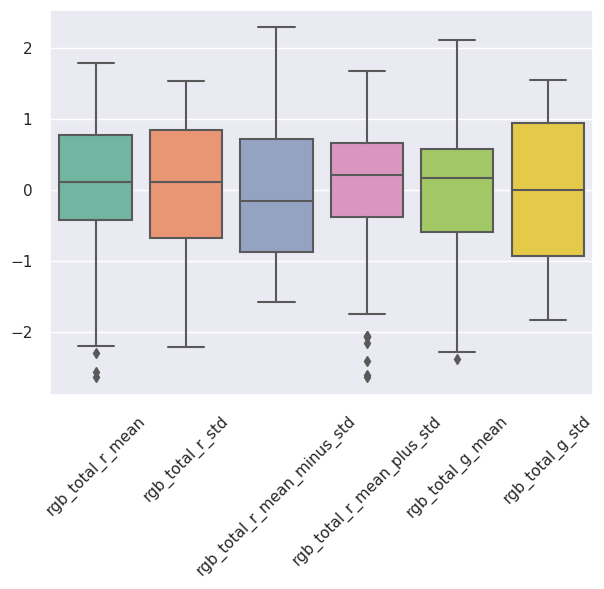

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

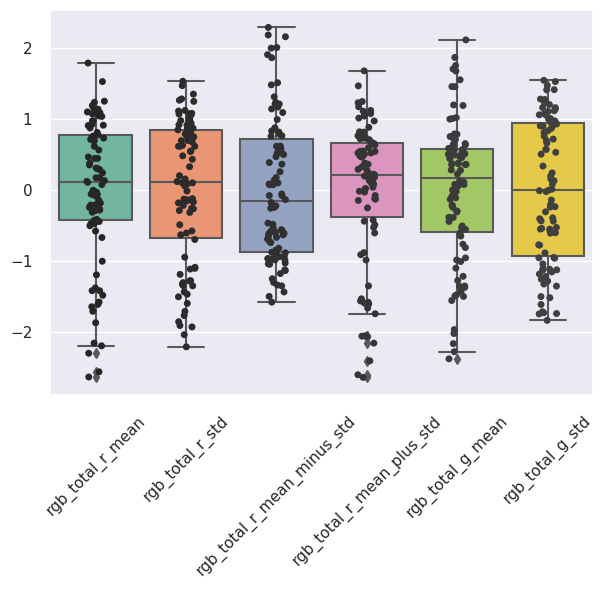

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

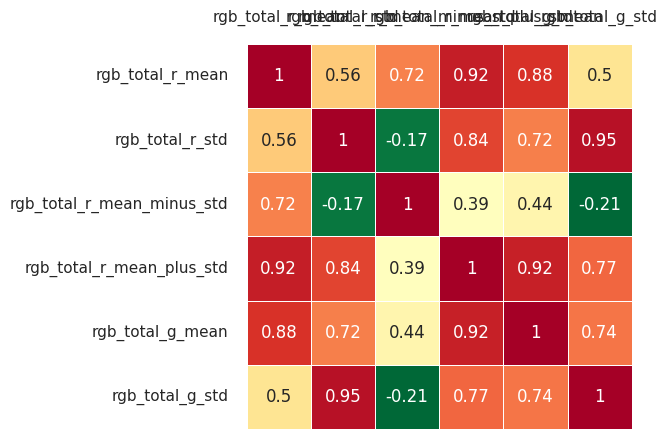

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#**Principal Component Analysis (PCA)**


Text(0, 0.5, '')

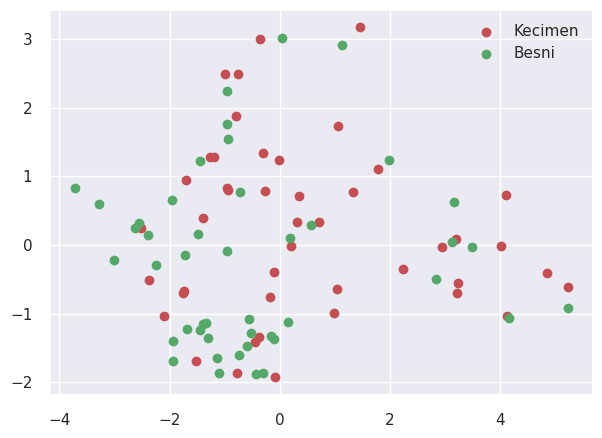

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)
y =df['class']
# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Kecimen = np.where(y == 0)
idx_Besni = np.where(y == 1)
#idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Kecimen,0], Z[idx_Kecimen,1], c='r', label='Kecimen')
plt.scatter(Z[idx_Besni,0], Z[idx_Besni,1], c='g', label='Besni')
#plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('')
plt.ylabel('')

**Eigenvectors**

[[-4.36390591e-01  3.38829373e-01  2.72806282e-01 -6.26132114e-02
   6.25272393e-01  4.74814343e-01]
 [-4.15406345e-01 -3.91571239e-01  3.98529830e-01  2.89827876e-01
   2.41242189e-01 -6.10807267e-01]
 [-1.70494146e-01  7.35060238e-01 -1.05945060e-02 -3.19369646e-01
  -1.18901236e-01 -5.60688394e-01]
 [-4.81580332e-01  4.09468746e-02  3.65794500e-01  9.38330284e-02
  -7.32597527e-01  2.95117515e-01]
 [-4.64067113e-01  8.79550524e-02 -7.42603061e-01  4.74811876e-01
  -1.37535565e-10 -2.53475650e-10]
 [-4.00817497e-01 -4.26779017e-01 -2.85260480e-01 -7.58835597e-01
  -2.65316527e-10  3.51185701e-10]]


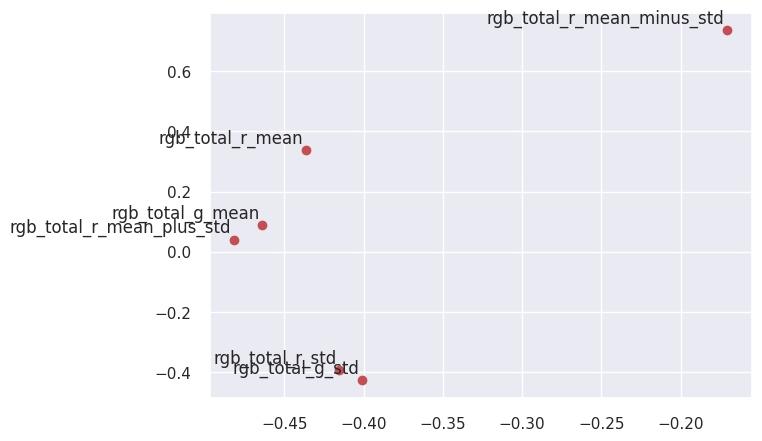

In [ ]:
A = pca.components_.T
print (A)
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('')
plt.ylabel('')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

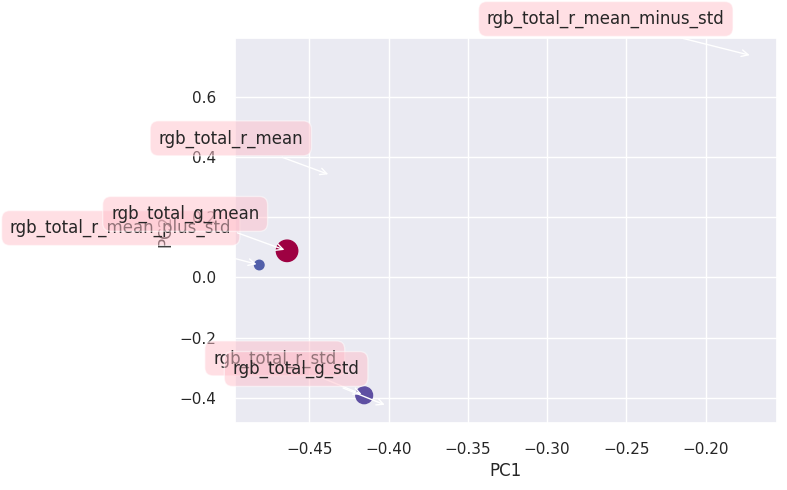

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('PC1')
plt.ylabel('PC2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='pink', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

[4.27179164e+00 1.63640528e+00 1.31024094e-01 2.81947166e-02
 2.71739807e-19 1.08062424e-19]


Text(0, 0.5, 'Explained variance')

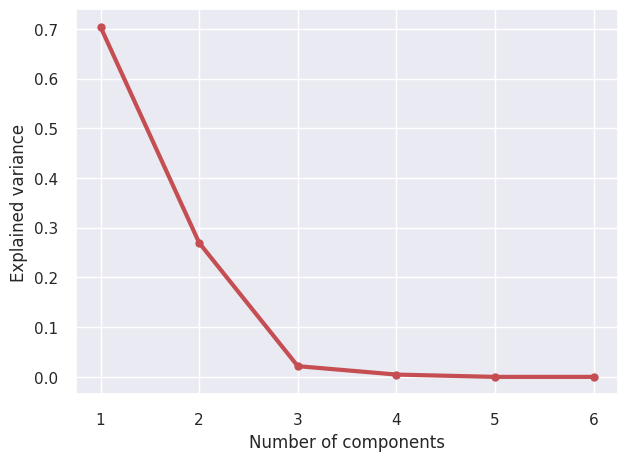

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_
print(Lambda)
#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

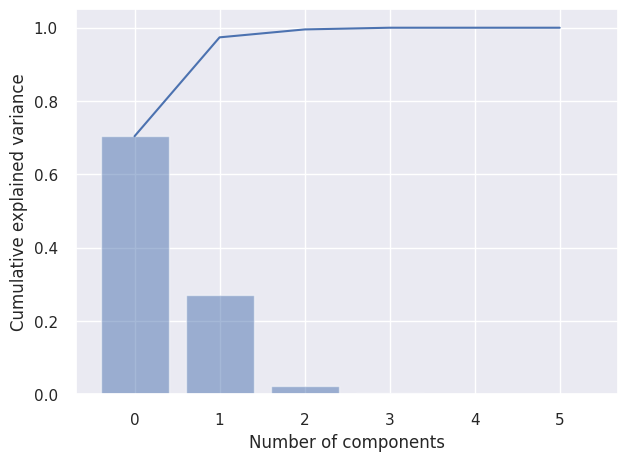

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

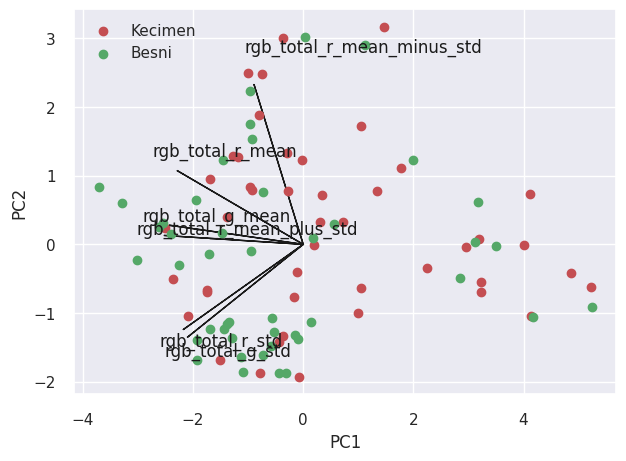

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]


y =df['class']
idx_Kecimen = np.where(y == 0)
idx_Besni = np.where(y == 1)


plt.figure()
plt.xlabel('PC1')
plt.ylabel('PC2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Kecimen,0], Z[idx_Kecimen,1], c='r', label='Kecimen')
plt.scatter(Z[idx_Besni,0], Z[idx_Besni,1], c='g', label='Besni')

plt.legend(loc='upper left')

#**Using PCA Library**


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [ ]:
out['PC']

,PC1,PC2
0,-0.795896,1.879877
1,3.220860,-0.697289
2,-0.958533,0.829287
3,-0.168712,-0.760289
4,-0.104175,-0.399196
...,...,...
85,-0.965340,1.754609
86,-1.482052,0.164168
87,-1.452502,1.224842
88,3.127368,0.041454


**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '2 Principal Components explain [99.53%] of the variance'}, xlabel='PC1 (70.4% expl.var)', ylabel='PC2 (26.9% expl.var)'>)

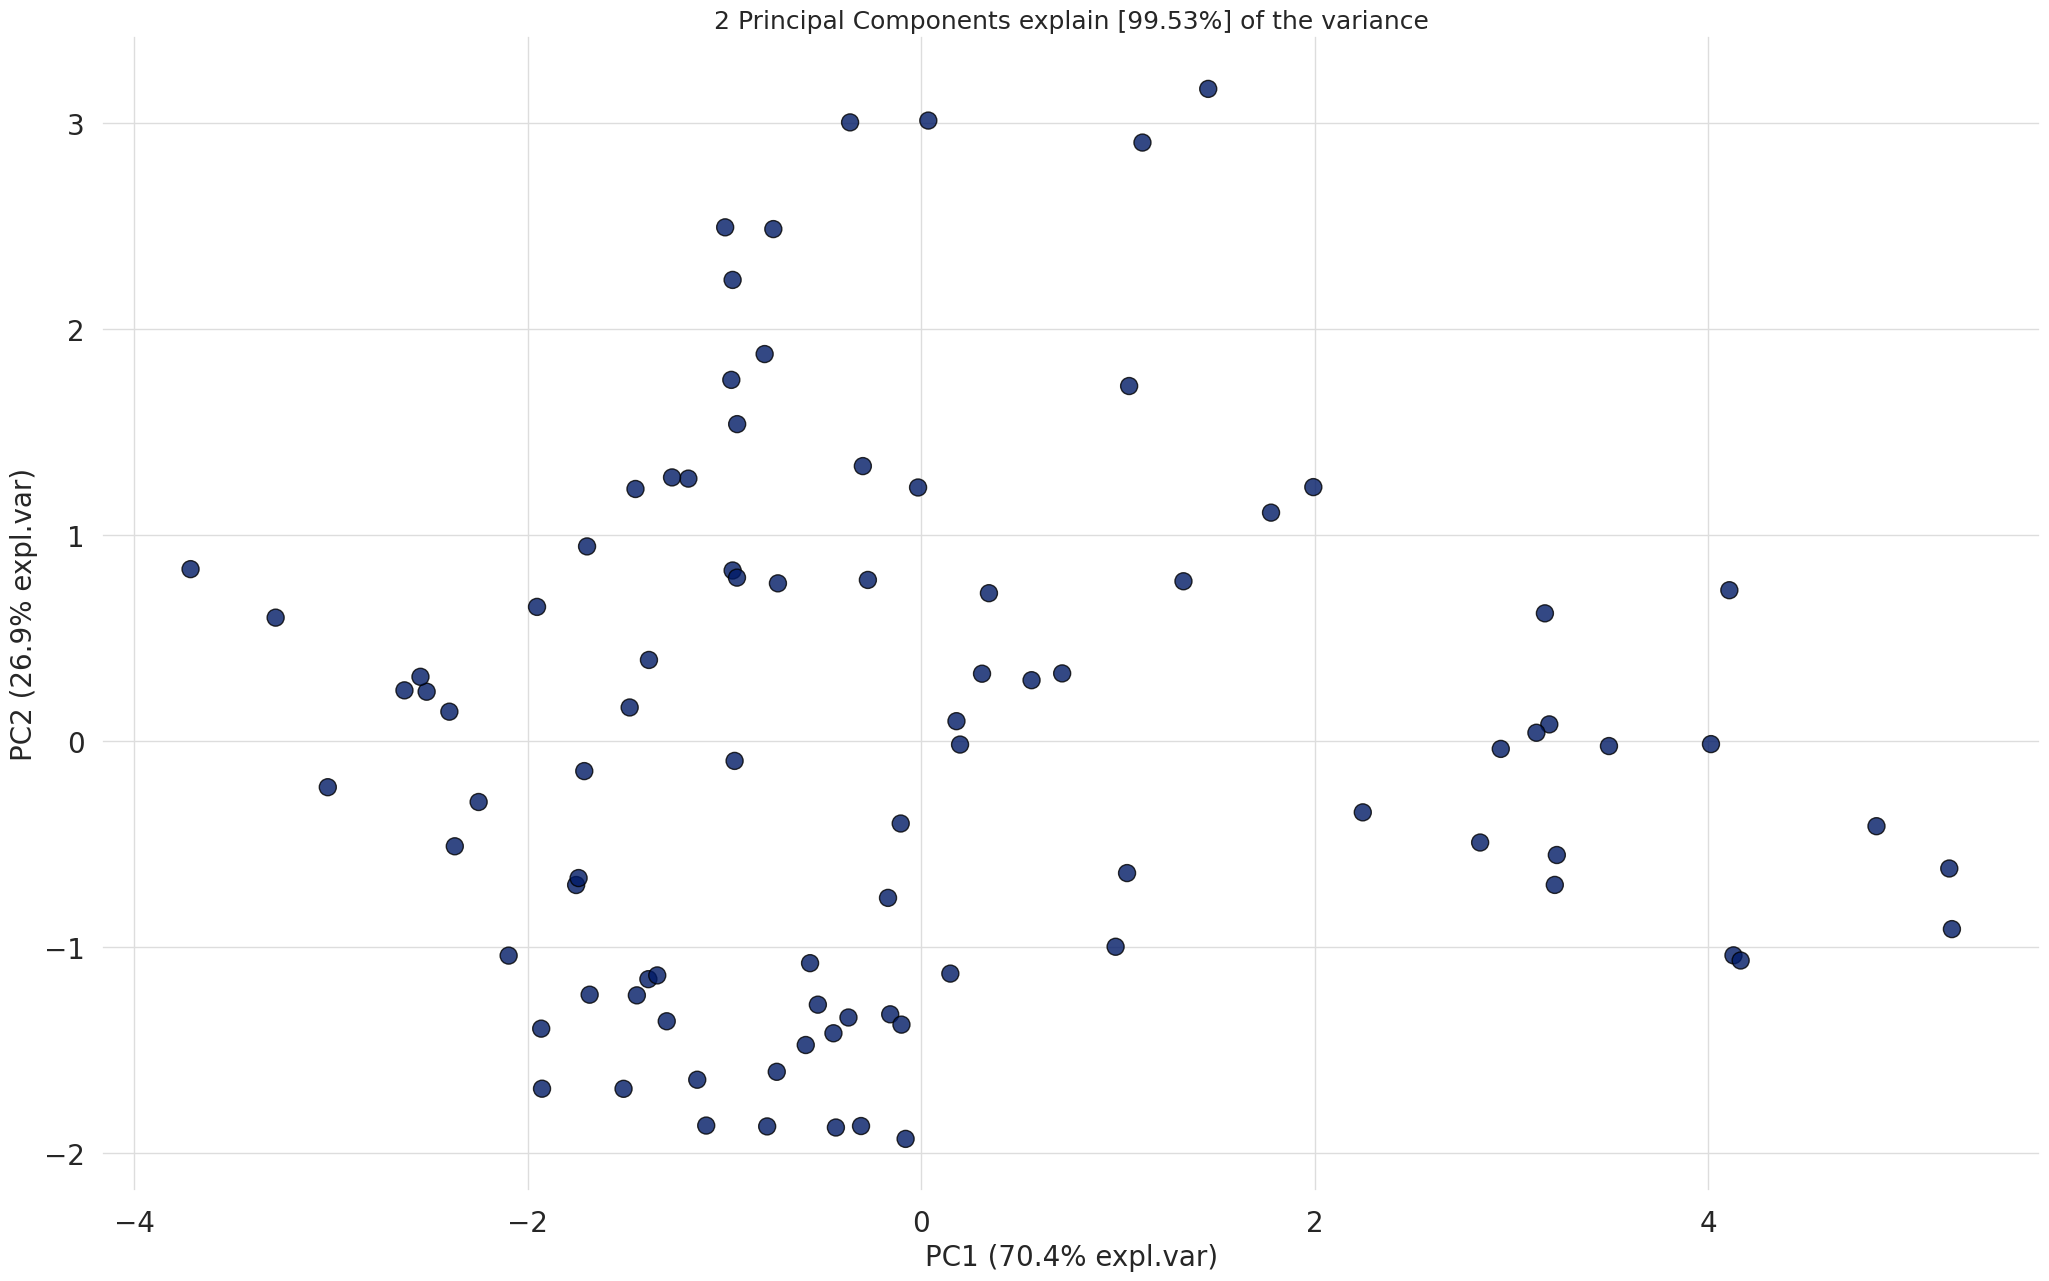

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T
A

,PC1,PC2
rgb_total_r_mean,-0.436391,0.338829
rgb_total_r_std,-0.415406,-0.391571
rgb_total_r_mean_minus_std,-0.170494,0.735060
rgb_total_r_mean_plus_std,-0.481580,0.040947
rgb_total_g_mean,-0.464067,0.087955
rgb_total_g_std,-0.400817,-0.426779


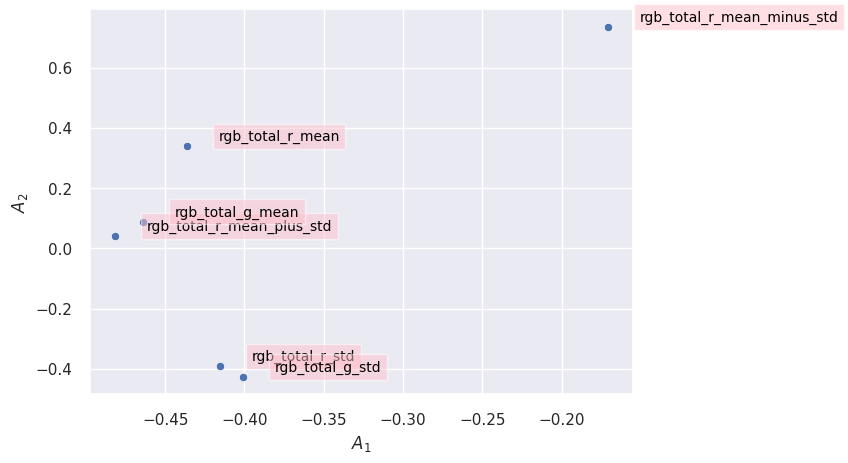

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='black',size=10),
          bbox=dict(facecolor='pink',alpha=0.5))

**Scree Plot**

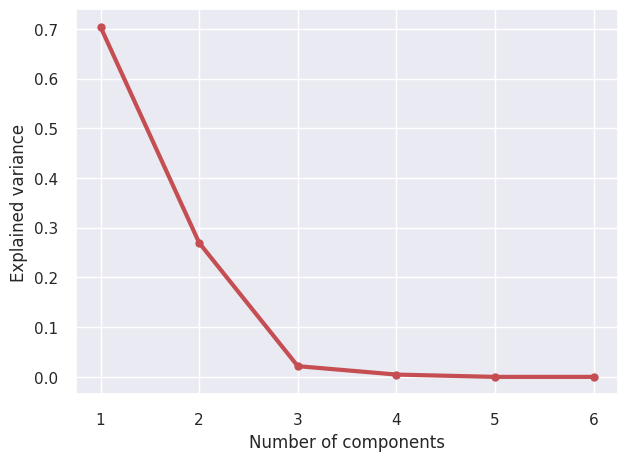

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

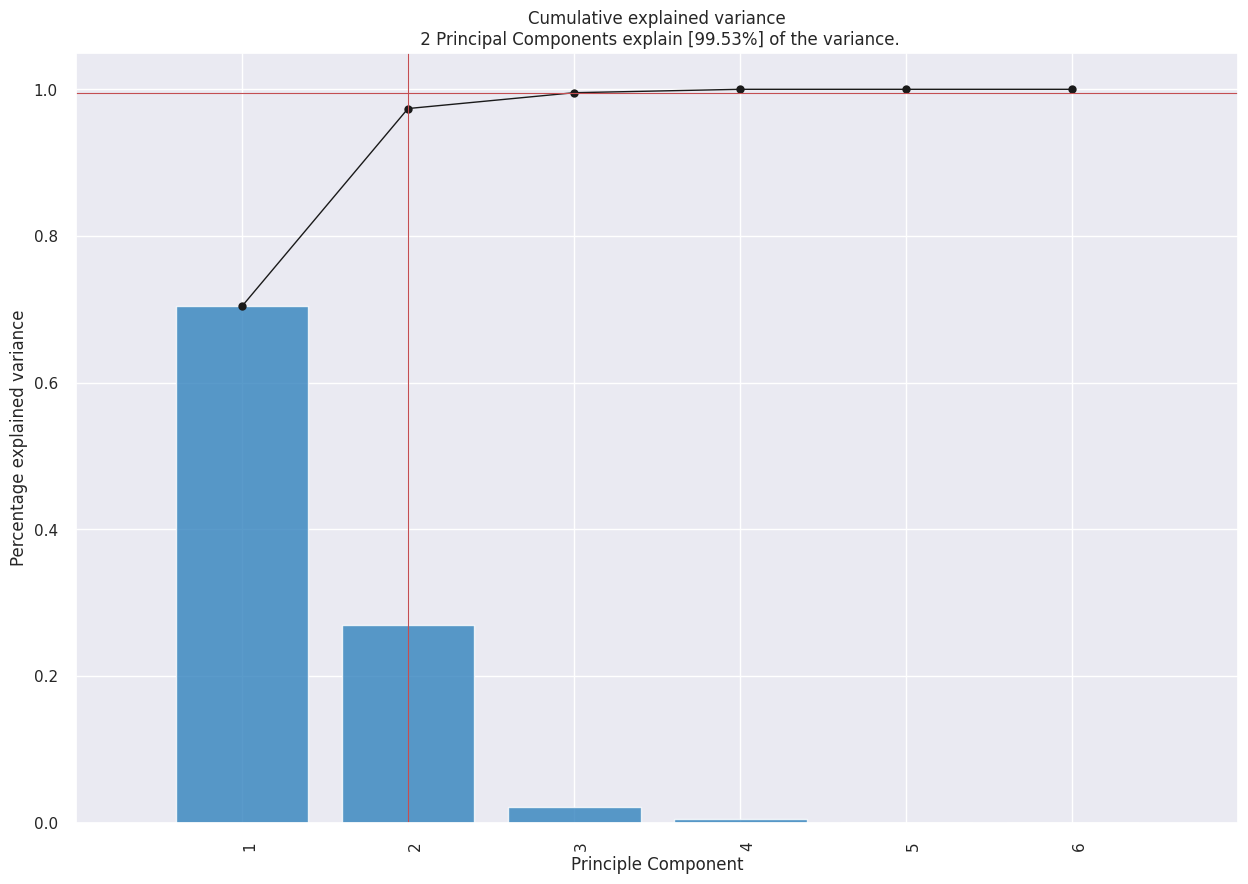

In [ ]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '2 Principal Components explain [99.53%] of the variance'}, xlabel='PC1 (70.4% expl.var)', ylabel='PC2 (26.9% expl.var)'>)

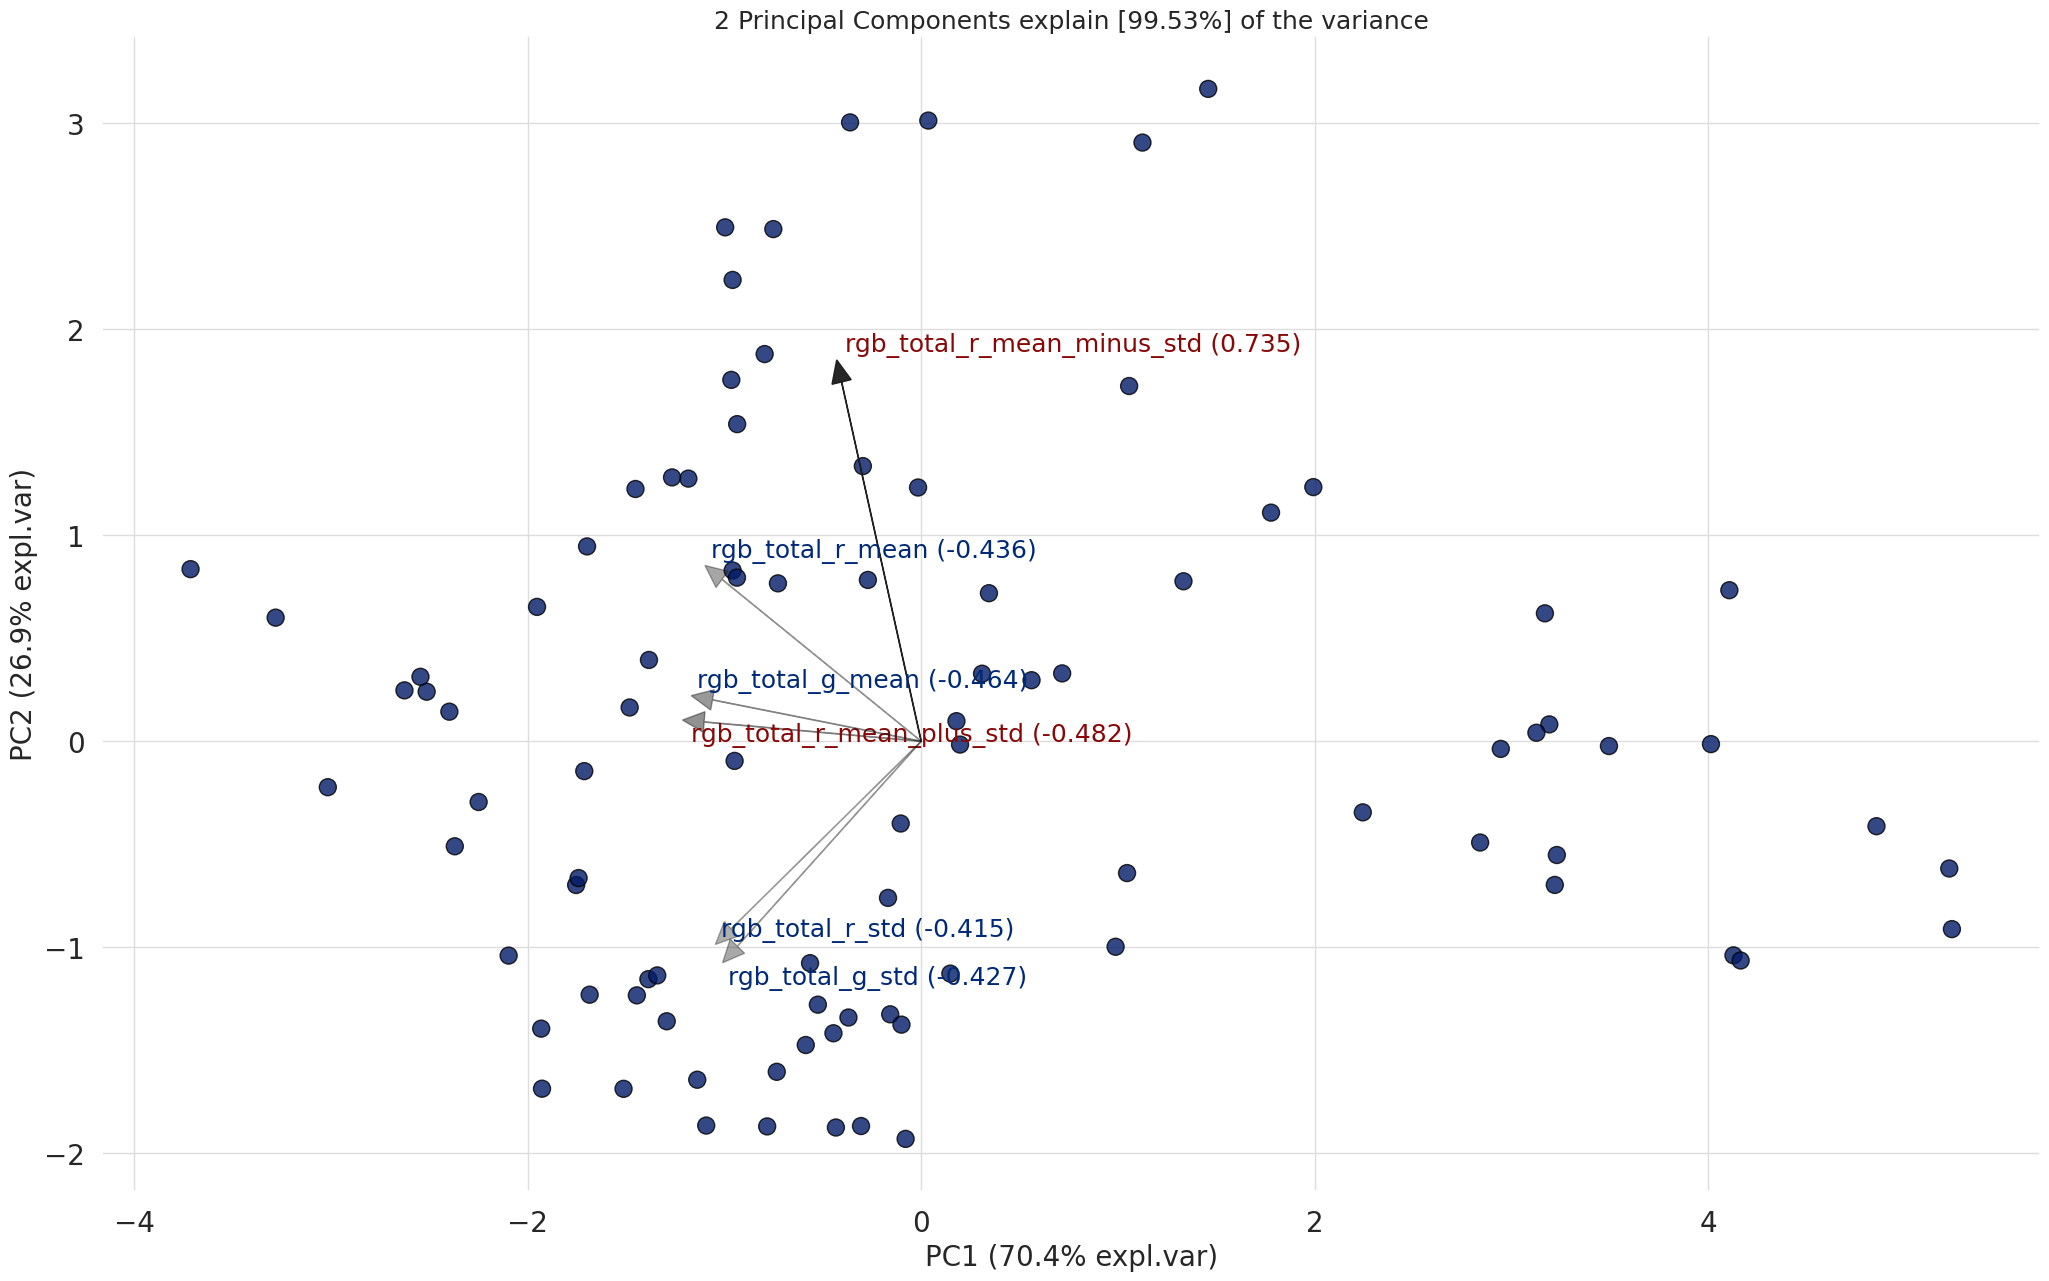

In [ ]:
model.biplot(label=False, legend=False, color_arrow='k')

#**Classification Using Pycaret**

To show how the predict_model() function works with new data, we kept 21 examples separate from the main dataset. This isn't like splitting the data for training and testing, but more like pretending these 21 pieces of data were unknown when we first did the machine learning experiment.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (81, 7)
Unseen Data For Predictions: (9, 7)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(81, 7)"
4,Transformed data shape,"(81, 7)"
5,Transformed train set shape,"(56, 7)"
6,Transformed test set shape,"(25, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8677,0.9311,0.8432,0.8862,0.8628,0.7351,0.7380,0.6060
qda,Quadratic Discriminant Analysis,0.8659,0.9242,0.7898,0.9329,0.8522,0.7314,0.7434,0.0460
ridge,Ridge Classifier,0.8625,0.9317,0.8469,0.8740,0.8588,0.7248,0.7274,0.0290
rf,Random Forest Classifier,0.8625,0.9300,0.8151,0.9011,0.8534,0.7247,0.7311,0.2630
et,Extra Trees Classifier,0.8572,0.9294,0.8148,0.8922,0.8483,0.7140,0.7210,0.1700
lightgbm,Light Gradient Boosting Machine,0.8572,0.9246,0.8366,0.8710,0.8523,0.7144,0.7165,0.1480
lda,Linear Discriminant Analysis,0.8554,0.9318,0.8505,0.8593,0.8533,0.7106,0.7132,0.0280
xgboost,Extreme Gradient Boosting,0.8519,0.9158,0.8261,0.8722,0.8455,0.7037,0.7088,0.0960
ada,Ada Boost Classifier,0.8501,0.9179,0.8151,0.8782,0.8424,0.7001,0.7059,0.1520
gbc,Gradient Boosting Classifier,0.8483,0.9240,0.8079,0.8805,0.8392,0.6963,0.7029,0.2050


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create a Model**

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8947,0.9261,0.8966,0.8966,0.8966,0.7894,0.7894
1,0.8421,0.9520,0.8929,0.8065,0.8475,0.6847,0.6885
2,0.8070,0.8966,0.7500,0.8400,0.7925,0.6132,0.6166
3,0.9123,0.9594,0.8571,0.9600,0.9057,0.8242,0.8288
4,0.8596,0.9643,0.7857,0.9167,0.8462,0.7185,0.7257
5,0.8947,0.9507,0.8571,0.9231,0.8889,0.7891,0.7911
6,0.8947,0.9064,0.8929,0.8929,0.8929,0.7894,0.7894
7,0.8750,0.9286,0.8929,0.8621,0.8772,0.7500,0.7505
8,0.8214,0.8954,0.7500,0.8750,0.8077,0.6429,0.6495


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8947,0.9286,0.8966,0.8966,0.8966,0.7894,0.7894
1,0.8421,0.9507,0.8929,0.8065,0.8475,0.6847,0.6885
2,0.8070,0.8978,0.7500,0.8400,0.7925,0.6132,0.6166
3,0.9123,0.9618,0.8571,0.9600,0.9057,0.8242,0.8288
4,0.8596,0.9643,0.7857,0.9167,0.8462,0.7185,0.7257
5,0.8772,0.9495,0.8571,0.8889,0.8727,0.7542,0.7546
6,0.8947,0.9064,0.8929,0.8929,0.8929,0.7894,0.7894
7,0.8929,0.9324,0.9286,0.8667,0.8966,0.7857,0.7877
8,0.8214,0.8992,0.7500,0.8750,0.8077,0.6429,0.6495


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#tuned model object is stored in the variable 'tuned_nb'.
tuned_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression Model**

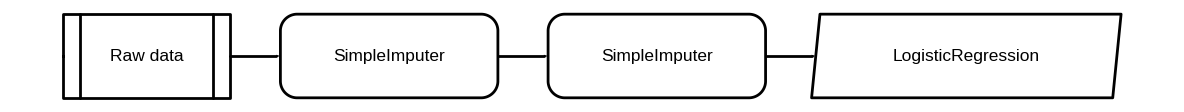

In [ ]:
evaluate_model(tuned_lr)

**Create Quadratic Discriminant Analysis Model**

In [ ]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8772,0.9249,0.8621,0.8929,0.8772,0.7545,0.7549
1,0.8947,0.9532,0.8571,0.9231,0.8889,0.7891,0.7911
2,0.8246,0.8830,0.6786,0.9500,0.7917,0.6473,0.6747
3,0.8772,0.9569,0.7500,1.0000,0.8571,0.7532,0.7773
4,0.8772,0.9236,0.7857,0.9565,0.8627,0.7536,0.7655
5,0.8596,0.9557,0.7857,0.9167,0.8462,0.7185,0.7257
6,0.8772,0.8879,0.8929,0.8621,0.8772,0.7545,0.7549
7,0.8929,0.9196,0.8571,0.9231,0.8889,0.7857,0.7877
8,0.8214,0.9094,0.6786,0.9500,0.7917,0.6429,0.6708


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Tune Quadratic Discriminant Analysis Model**

In [ ]:
tuned_qda = tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8596,0.9089,0.8621,0.8621,0.8621,0.7192,0.7192
1,0.8947,0.9507,0.8571,0.9231,0.8889,0.7891,0.7911
2,0.8070,0.8830,0.6786,0.9048,0.7755,0.6122,0.6318
3,0.8772,0.9483,0.7500,1.0000,0.8571,0.7532,0.7773
4,0.8772,0.9372,0.7857,0.9565,0.8627,0.7536,0.7655
5,0.8596,0.9569,0.7500,0.9545,0.8400,0.7182,0.7348
6,0.8947,0.9212,0.8929,0.8929,0.8929,0.7894,0.7894
7,0.8571,0.8916,0.8571,0.8571,0.8571,0.7143,0.7143
8,0.8393,0.9082,0.6786,1.0000,0.8085,0.6786,0.7166


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Quadratic Discriminant Analysis Model**

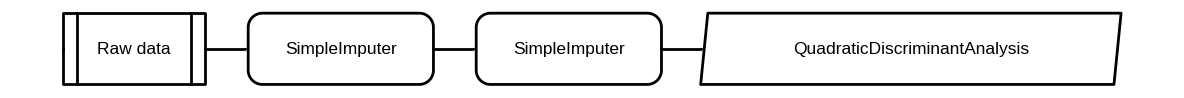

In [ ]:
evaluate_model(tuned_qda)

**Create Ridge Classifier Model**

In [ ]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8596,0.9212,0.8621,0.8621,0.8621,0.7192,0.7192
1,0.8772,0.9544,0.8929,0.8621,0.8772,0.7545,0.7549
2,0.8070,0.8892,0.7500,0.8400,0.7925,0.6132,0.6166
3,0.9123,0.9581,0.8571,0.9600,0.9057,0.8242,0.8288
4,0.8596,0.9680,0.7857,0.9167,0.8462,0.7185,0.7257
5,0.8596,0.9532,0.8571,0.8571,0.8571,0.7192,0.7192
6,0.8421,0.9052,0.8929,0.8065,0.8475,0.6847,0.6885
7,0.8929,0.9324,0.9286,0.8667,0.8966,0.7857,0.7877
8,0.8393,0.9056,0.7857,0.8800,0.8302,0.6786,0.6825


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
ridge

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

**Tune Ridge Classifier Model**

In [ ]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.0000,0.3333,1.0000,0.5000,0.3333,0.4472
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.5000,0.0000,0.3333,0.5000,0.4000,0.0000,0.0000
3,0.8333,0.0000,0.6667,1.0000,0.8000,0.6667,0.7071
4,0.8333,0.0000,1.0000,0.7500,0.8571,0.6667,0.7071
5,0.5000,0.0000,0.6667,0.5000,0.5714,0.0000,0.0000
6,0.2000,0.0000,0.5000,0.2500,0.3333,-0.4286,-0.6124
7,0.6000,0.0000,0.5000,0.5000,0.5000,0.1667,0.1667
8,0.8000,0.0000,1.0000,0.7500,0.8571,0.5455,0.6124


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Ridge Classifier Model**

In [ ]:
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,1.0000,0.6667,1.0000,0.8000,0.6667,0.7071
1,0.6667,0.6667,1.0000,0.6000,0.7500,0.3333,0.4472
2,0.5000,0.5556,0.3333,0.5000,0.4000,0.0000,0.0000
3,0.5000,0.6111,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8333,0.8333,1.0000,0.7500,0.8571,0.6667,0.7071
5,0.6667,0.5556,0.6667,0.6667,0.6667,0.3333,0.3333
6,0.6000,0.4167,1.0000,0.5000,0.6667,0.2857,0.4082
7,0.6000,0.5833,0.5000,0.5000,0.5000,0.1667,0.1667
8,0.8000,0.5000,1.0000,0.7500,0.8571,0.5455,0.6124


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,30,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.8889,0.6667,1.0000,0.8000,0.6667,0.7071
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.5000,0.5556,0.3333,0.5000,0.4000,0.0000,0.0000
3,0.8333,0.7778,0.6667,1.0000,0.8000,0.6667,0.7071
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.6667,0.6111,0.6667,0.6667,0.6667,0.3333,0.3333
6,0.4000,0.5000,0.5000,0.3333,0.4000,-0.1538,-0.1667
7,0.4000,0.5833,0.5000,0.3333,0.4000,-0.1538,-0.1667
8,0.6000,0.5833,0.6667,0.6667,0.6667,0.1667,0.1667


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate K Neighbors Model**

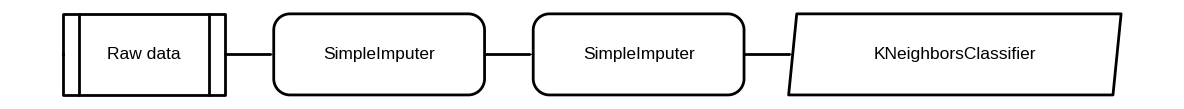

In [ ]:
evaluate_model(tuned_knn)

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.6667,0.6667,1.0000,0.8000,0.6667,0.7071
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.3333,0.3333,0.3333,0.3333,0.3333,-0.3333,-0.3333
3,0.6667,0.8889,0.6667,0.6667,0.6667,0.3333,0.3333
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.6667,0.7778,0.6667,0.6667,0.6667,0.3333,0.3333
6,0.4000,0.1667,0.5000,0.3333,0.4000,-0.1538,-0.1667
7,0.4000,0.3333,0.5000,0.3333,0.4000,-0.1538,-0.1667
8,0.8000,0.5000,1.0000,0.7500,0.8571,0.5455,0.6124


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model

GaussianNB(priors=None, var_smoothing=1e-09)

**Evaluate the Best Model**

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(81, 7)"
4,Transformed data shape,"(81, 4)"
5,Transformed train set shape,"(56, 4)"
6,Transformed test set shape,"(25, 4)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


**Comparing Models**

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6867,0.6056,0.6333,0.7667,0.6557,0.3903,0.4063,0.0340
qda,Quadratic Discriminant Analysis,0.6867,0.6778,0.6333,0.7250,0.6524,0.3738,0.3933,0.0320
ridge,Ridge Classifier,0.6700,0.0000,0.6333,0.7417,0.6414,0.3569,0.3770,0.0320
lightgbm,Light Gradient Boosting Machine,0.6700,0.7278,0.6667,0.7333,0.6552,0.3523,0.3882,0.0540
knn,K Neighbors Classifier,0.6600,0.6694,0.6500,0.6267,0.5998,0.3284,0.3790,0.0450
lda,Linear Discriminant Analysis,0.6533,0.6556,0.6333,0.7250,0.6319,0.3236,0.3436,0.0350
svm,SVM - Linear Kernel,0.5700,0.0000,0.5333,0.5583,0.5224,0.1450,0.1374,0.0300
nb,Naive Bayes,0.5633,0.6167,0.6333,0.5517,0.5812,0.1013,0.1040,0.0330
dt,Decision Tree Classifier,0.5433,0.5333,0.5167,0.4167,0.4543,0.0679,0.0439,0.0320
gbc,Gradient Boosting Classifier,0.5333,0.5167,0.5167,0.5400,0.5067,0.0875,0.0680,0.1320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**Best model with PCA**

In [ ]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.6667,0.6667,1.0000,0.8000,0.6667,0.7071
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.3333,0.3333,0.3333,0.3333,0.3333,-0.3333,-0.3333
3,0.6667,0.8889,0.6667,0.6667,0.6667,0.3333,0.3333
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.6667,0.7778,0.6667,0.6667,0.6667,0.3333,0.3333
6,0.4000,0.1667,0.5000,0.3333,0.4000,-0.1538,-0.1667
7,0.6000,0.3333,0.5000,0.5000,0.5000,0.1667,0.1667
8,0.8000,0.5000,1.0000,0.7500,0.8571,0.5455,0.6124


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_best_model_pca

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Best Model**

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
lr_pca = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.6667,0.3333,1.0000,0.5000,0.3333,0.4472
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.5000,0.3333,0.3333,0.5000,0.4000,0.0000,0.0000
3,0.8333,0.8889,0.6667,1.0000,0.8000,0.6667,0.7071
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333
6,0.2000,0.3333,0.5000,0.2500,0.3333,-0.4286,-0.6124
7,0.6000,0.3333,0.5000,0.5000,0.5000,0.1667,0.1667
8,0.8000,0.5000,1.0000,0.7500,0.8571,0.5455,0.6124


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Model**

In [ ]:
tuned_lr_pca = tune_model(lr_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.6667,0.6667,1.0000,0.8000,0.6667,0.7071
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.3333,0.3333,0.3333,0.3333,0.3333,-0.3333,-0.3333
3,0.6667,0.8889,0.6667,0.6667,0.6667,0.3333,0.3333
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.6667,0.7778,0.6667,0.6667,0.6667,0.3333,0.3333
6,0.4000,0.1667,0.5000,0.3333,0.4000,-0.1538,-0.1667
7,0.6000,0.3333,0.5000,0.5000,0.5000,0.1667,0.1667
8,0.8000,0.5000,1.0000,0.7500,0.8571,0.5455,0.6124


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Model**

In [ ]:
tuned_lr_pca

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Quadratic Discriminant Analysis Model**

In [ ]:
qda_pca = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7778,0.3333,1.0000,0.5000,0.3333,0.4472
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.5000,0.3333,0.3333,0.5000,0.4000,0.0000,0.0000
3,0.8333,1.0000,0.6667,1.0000,0.8000,0.6667,0.7071
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333
6,0.4000,0.5000,0.5000,0.3333,0.4000,-0.1538,-0.1667
7,0.6000,0.3333,0.5000,0.5000,0.5000,0.1667,0.1667
8,0.8000,0.8333,1.0000,0.7500,0.8571,0.5455,0.6124


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model**

In [ ]:
tuned_qda_pca = tune_model(qda_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.6667,0.6667,1.0000,0.8000,0.6667,0.7071
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.3333,0.3333,0.3333,0.3333,0.3333,-0.3333,-0.3333
3,0.8333,0.8889,0.6667,1.0000,0.8000,0.6667,0.7071
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.6667,0.7778,0.6667,0.6667,0.6667,0.3333,0.3333
6,0.4000,0.1667,0.5000,0.3333,0.4000,-0.1538,-0.1667
7,0.6000,0.3333,0.5000,0.5000,0.5000,0.1667,0.1667
8,0.8000,0.5000,1.0000,0.7500,0.8571,0.5455,0.6124


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Model**

In [ ]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.66,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Ridge Classifier Model**

In [ ]:
ridge_pca = create_model("ridge")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.0000,0.3333,1.0000,0.5000,0.3333,0.4472
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.5000,0.0000,0.3333,0.5000,0.4000,0.0000,0.0000
3,0.8333,0.0000,0.6667,1.0000,0.8000,0.6667,0.7071
4,0.8333,0.0000,1.0000,0.7500,0.8571,0.6667,0.7071
5,0.6667,0.0000,0.6667,0.6667,0.6667,0.3333,0.3333
6,0.2000,0.0000,0.5000,0.2500,0.3333,-0.4286,-0.6124
7,0.6000,0.0000,0.5000,0.5000,0.5000,0.1667,0.1667
8,0.8000,0.0000,1.0000,0.7500,0.8571,0.5455,0.6124


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model**

In [ ]:
tuned_ridge_pca = tune_model(ridge_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.0000,0.6667,1.0000,0.8000,0.6667,0.7071
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.5000,0.0000,0.3333,0.5000,0.4000,0.0000,0.0000
3,0.8333,0.0000,0.6667,1.0000,0.8000,0.6667,0.7071
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.6667,0.0000,0.6667,0.6667,0.6667,0.3333,0.3333
6,0.2000,0.0000,0.5000,0.2500,0.3333,-0.4286,-0.6124
7,0.6000,0.0000,0.5000,0.5000,0.5000,0.1667,0.1667
8,0.8000,0.0000,1.0000,0.7500,0.8571,0.5455,0.6124


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Model**

In [ ]:
tuned_ridge_pca

RidgeClassifier(alpha=5.62, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [ ]:
evaluate_model(tuned_ridge_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Explainable AI with Shapley values**

In [ ]:
print("Numpy version: ", np.__version__)

Numpy version:  1.23.5


In [ ]:
import shap


In [ ]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.7778,0.3333,0.5000,0.4000,0.0000,0.0000
1,0.3333,0.3333,0.6667,0.4000,0.5000,-0.3333,-0.4472
2,0.5000,0.4444,0.3333,0.5000,0.4000,0.0000,0.0000
3,0.3333,0.2222,0.0000,0.0000,0.0000,-0.3333,-0.4472
4,0.6667,0.7778,0.6667,0.6667,0.6667,0.3333,0.3333
5,0.6667,0.4444,0.6667,0.6667,0.6667,0.3333,0.3333
6,0.4000,0.3333,0.5000,0.3333,0.4000,-0.1538,-0.1667
7,0.4000,0.3333,0.5000,0.3333,0.4000,-0.1538,-0.1667
8,0.8000,0.5000,1.0000,0.7500,0.8571,0.5455,0.6124


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7778,0.6667,0.6667,0.6667,0.3333,0.3333
1,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
2,0.5000,0.5556,0.3333,0.5000,0.4000,0.0000,0.0000
3,0.8333,0.7778,0.6667,1.0000,0.8000,0.6667,0.7071
4,0.6667,1.0000,1.0000,0.6000,0.7500,0.3333,0.4472
5,0.6667,0.5556,0.6667,0.6667,0.6667,0.3333,0.3333
6,0.4000,0.3333,0.5000,0.3333,0.4000,-0.1538,-0.1667
7,0.6000,0.3333,0.5000,0.5000,0.5000,0.1667,0.1667
8,0.8000,0.5000,1.0000,0.7500,0.8571,0.5455,0.6124


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_samples_leaf=4, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [ ]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**SHAP Summary Plot**

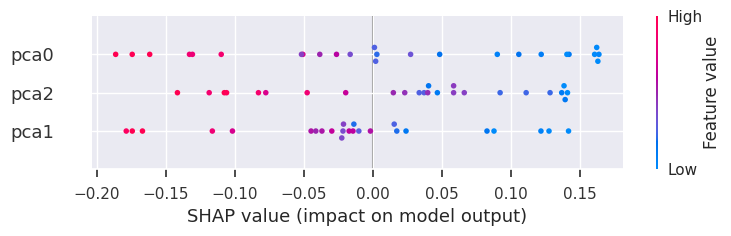

In [ ]:
interpret_model(tuned_et_pca, plot='summary')

In [ ]:
interpret_model(tuned_et_pca, plot='reason', observation=20)

In [ ]:
interpret_model(tuned_et_pca, plot='reason')